In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import file_organizer as fo

from func import fit_t2
from scipy.signal import find_peaks

## Destilliertes Wasser: T2 Zeit

In [ ]:
PATH = 'data_day_three'

# 171 - 175: 
d = fo.load_sfile('scope_173.csv', path=PATH)

peaks = find_peaks(d['signal'], distance=100, height=0.6)[0]
ptime = d.loc[peaks, 'time']
pval = d.loc[peaks, 'signal']

fit = fit_t2(ptime, pval, log=True)

[[Model]]
    Model(t2func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 75
    # variables        = 3
    chi-square         = 0.17934477
    reduced chi-square = 0.00249090
    Akaike info crit   = -446.695002
    Bayesian info crit = -439.742537
[[Variables]]
    M0:     2.80981996 +/- 0.02328672 (0.83%) (init = 1)
    T2:     0.64817244 +/- 0.01678444 (2.59%) (init = 0.02)
    const:  0.49563273 +/- 0.02438767 (4.92%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(T2, const) = -0.920
    C(M0, const) = -0.582
    C(M0, T2)    = 0.310


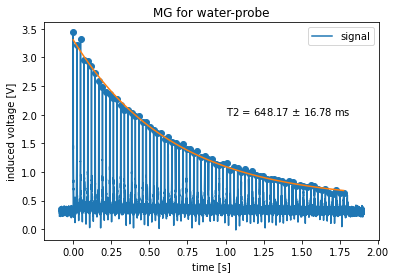

In [ ]:
fig, ax = plt.subplots()
d.plot(x='time', y='signal', ax=ax)
ax.scatter(ptime, pval)
ax.plot(ptime, fit.best_fit)
ax.set_title('MG for water-probe')
ax.text(1,2,f'T2 = {fit.params["T2"].value*1000:.2f} $\\pm$ {fit.params["T2"].stderr*1000:.2f} ms')
ax.set_xlabel('time [s]')
ax.set_ylabel ('induced voltage [V]')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c333ff75-d5d2-432c-b928-cf45631da0c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>